## Importing libraries

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

## Preparing data

Since the dataset is split into **multiple files**, I'm going to read file-by-file and save them to a list so that I can concatenate them together for later analysis.

In [ ]:
pieces = []
for year in range(1880, 2024):
    path = f'datasets/yob{year}.txt'
    frame = pd.read_csv(path, sep=',', names=['name', 'sex', 'births'])
    # assign the year to the frame
    frame['year'] = year
    # append the frame to pieces
    pieces.append(frame)

# concatenate the pieces into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names.head()

Now we have a single DataFrame containing all of the names data across all years, let's start aggregating the data at the year and sex level using *groupby* or *pivot_table*

In [ ]:
total_births = names.pivot_table(values='births', index='year', columns='sex', aggfunc="sum")
total_births.tail()

sex,F,M
year,,
2019,1676568,1792223
2020,1614196,1723649
2021,1638188,1746499
2022,1636657,1741954
2023,1596022,1701224


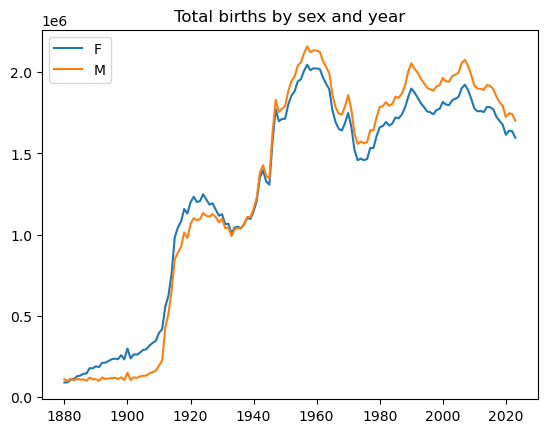

In [ ]:
plt.plot(total_births)
plt.title('Total births by sex and year')
plt.legend(['F', 'M'])
plt.show()

Let's insert a column prop with the fraction of babies given each name relative to that year for that sex. For example, a prop of 0.03 would indicate that 3 out of 100 babies were given a particular name. 

In [211]:
# create a function to calculate the fraction for a particular name

def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

# apply the function to each group of year-sex combination
names = names.groupby(['year', 'sex']).apply(add_prop, include_groups=False).reset_index(level=['year', 'sex'])
names.head()

,year,sex,name,births,prop
0,1880,F,Mary,7065,0.077642
1,1880,F,Anna,2604,0.028617
2,1880,F,Emma,2003,0.022012
3,1880,F,Elizabeth,1939,0.021309
4,1880,F,Minnie,1746,0.019188


It's always better to do a sanity check such as verifying that the prop column sums to 1 within all the groups

In [ ]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2021  M      1.0
2022  F      1.0
      M      1.0
2023  F      1.0
      M      1.0
Name: prop, Length: 288, dtype: float64

For further analysis, I just care about top 1000 names within each group

In [213]:
def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]
top_1000 = names.groupby(['year', 'sex']).apply(get_top1000)

top_1000.head()

C:\Users\tamqu\AppData\Local\Temp\ipykernel_18336\234906276.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_1000 = names.groupby(['year', 'sex']).apply(get_top1000)


year sex       name  births      prop
year sex                                         
1880 F   0  1880   F       Mary    7065  0.077642
         1  1880   F       Anna    2604  0.028617
         2  1880   F       Emma    2003  0.022012
         3  1880   F  Elizabeth    1939  0.021309
         4  1880   F     Minnie    1746  0.019188

In [ ]:
top_1000 = top_1000.reset_index(drop=True)

In [216]:
top_1000.tail()

,year,sex,name,births,prop
287871,2023,M,Thatcher,220,0.000129
287872,2023,M,Abner,219,0.000129
287873,2023,M,Cullen,219,0.000129
287874,2023,M,Damari,219,0.000129
287875,2023,M,Hollis,219,0.000129


In [217]:
top_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287876 entries, 0 to 287875
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    287876 non-null  int64  
 1   sex     287876 non-null  object 
 2   name    287876 non-null  object 
 3   births  287876 non-null  int64  
 4   prop    287876 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.0+ MB
